In [5]:
import pandas as pd
movies = pd.read_csv('data_small/movies.csv')

In [8]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [11]:
ratings = pd.read_csv('data_small/ratings.csv')
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

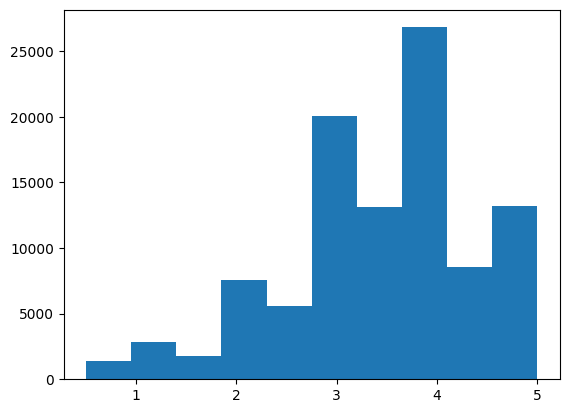

In [12]:
from matplotlib import pyplot as plt
plt.hist(ratings.rating)


ValueError: x and y must be the same size

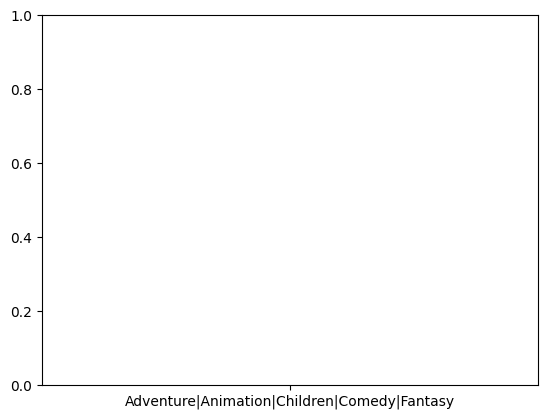

In [13]:
# lets see a scatter plot of genres vs ratings
plt.scatter(movies.genres, ratings.rating)
plt.show()

In [14]:
movies.genres, ratings.rating

(0       Adventure|Animation|Children|Comedy|Fantasy
 1                        Adventure|Children|Fantasy
 2                                    Comedy|Romance
 3                              Comedy|Drama|Romance
 4                                            Comedy
                            ...                     
 9737                Action|Animation|Comedy|Fantasy
 9738                       Animation|Comedy|Fantasy
 9739                                          Drama
 9740                               Action|Animation
 9741                                         Comedy
 Name: genres, Length: 9742, dtype: object,
 0         4.0
 1         4.0
 2         4.0
 3         5.0
 4         5.0
          ... 
 100831    4.0
 100832    5.0
 100833    5.0
 100834    5.0
 100835    3.0
 Name: rating, Length: 100836, dtype: float64)

In [15]:
#join the movies and ratings dataframes
movies_ratings = pd.merge(movies, ratings, on='movieId')
movies_ratings.head()

#lets see the average rating for each movie
movies_ratings.groupby('movieId').rating.mean().sort_values(ascending=False).head(10)


movieId
88448     5.0
100556    5.0
143031    5.0
143511    5.0
143559    5.0
6201      5.0
102217    5.0
102084    5.0
6192      5.0
145994    5.0
Name: rating, dtype: float64

In [19]:
df = ratings.copy()
df = df.sort_values(['userId', 'timestamp'])
df['is_pos'] = df["rating"] >= 4

pos = df[df["is_pos"]].copy()
# Rank positives within each user (1..n)
pos["rnk"] = pos.groupby("userId")["timestamp"].rank(method = "first")

In [20]:
df.head()

,userId,movieId,rating,timestamp,is_pos
43,1,804,4.0,964980499,True
73,1,1210,5.0,964980499,True
120,1,2018,5.0,964980523,True
171,1,2628,4.0,964980523,True
183,1,2826,4.0,964980523,True


In [21]:
pos.head()

,userId,movieId,rating,timestamp,is_pos,rnk
43,1,804,4.0,964980499,True,1.0
73,1,1210,5.0,964980499,True,2.0
120,1,2018,5.0,964980523,True,3.0
171,1,2628,4.0,964980523,True,4.0
183,1,2826,4.0,964980523,True,5.0


In [23]:
n_pos = pos.groupby("userId")["rnk"].max().rename("n_pos")
    pos = pos.merge(n_pos, on = "userId")

IndentationError: unexpected indent (3586691534.py, line 2)

In [24]:
n_pos = pos.groupby("userId")["rnk"].max().rename("n_pos")
pos = pos.merge(n_pos, on = "userId")

In [25]:
pos.head()

,userId,movieId,rating,timestamp,is_pos,rnk,n_pos
0,1,804,4.0,964980499,True,1.0,200.0
1,1,1210,5.0,964980499,True,2.0,200.0
2,1,2018,5.0,964980523,True,3.0,200.0
3,1,2628,4.0,964980523,True,4.0,200.0
4,1,2826,4.0,964980523,True,5.0,200.0


In [26]:
# keep only users with at least 2 positives
pos = pos[pos["n_pos"] >= 2].copy()

# create test, val, train splits
test = pos[pos["rnk"] == pos["n_pos"]].copy()
val = pos[pos["rnk"] == pos["n_pos"] - 1].copy()
train = pos[pos["rnk"] < pos["n_pos"] - 1].copy()

In [27]:
test.head()
val.head()
train.head()

,userId,movieId,rating,timestamp,is_pos,rnk,n_pos
0,1,804,4.0,964980499,True,1.0,200.0
1,1,1210,5.0,964980499,True,2.0,200.0
2,1,2018,5.0,964980523,True,3.0,200.0
3,1,2628,4.0,964980523,True,4.0,200.0
4,1,2826,4.0,964980523,True,5.0,200.0


In [28]:
users = np.sort(train_data["userId"].unique())

NameError: name 'np' is not defined

In [29]:
import np from numpy


SyntaxError: invalid syntax (3138366517.py, line 1)

In [30]:
import numpy as np

In [31]:
users = np.sort(train_data["userId"].unique())

NameError: name 'train_data' is not defined

In [32]:
users = np.sort(train["userId"].unique())

In [33]:
users.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [34]:
print(users)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

In [35]:
users = np.sort(train_data["userId"].unique())
items = np.sort(train_data["movieId"].unique())
# Lookup take from id to index
user_idx = {u: i for i, u in enumerate(users)}
item_idx = {i: i for i, i in enumerate(items)}

NameError: name 'train_data' is not defined

In [36]:
users = np.sort(train["userId"].unique())
items = np.sort(train["movieId"].unique())
# Lookup take from id to index
user_idx = {u: i for i, u in enumerate(users)}
item_idx = {i: i for i, i in enumerate(items)}

In [37]:
rows = train["movieId"].map(item_idx).values
cols = train["userId"].map(user_idx).values

In [38]:
rows.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'